In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product
from brokenaxes import brokenaxes
import pingouin as pg

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']

dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108']
danimals = ['DS_15','DS_19','DS_24','DS_27','DS_28']

retroanimals = ['PB_86','BS_86','PB_92','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165']
did_learn = ['BS_92','BS_103','BS_111','BS_179']
did_not_learn = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
indeterminate = ['BS_139','BS_165','BS_191','BS_192']

animals = np.concatenate([did_not_learn,dualanimalnames,['DS_15','DS_19']])

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

stim25sdecodingfilename = 'D:\\stimdecoding_25s.csv'
stim25sopsinondecodingfilename = 'D:\\stimdecoding_25s_opsin_on.csv'
stim25sopsinoffdecodingfilename = 'D:\\stimdecoding_25s_opsin_off.csv'
choicedecodingfilename = 'D:\\choicedecoding.csv'
choiceopsinondecodingfilename = 'D:\\choicedecoding_opsin_on.csv'
choiceopsinoffdecodingfilename = 'D:\\choicedecoding_opsin_off.csv'

# Automated Phases

In [2]:
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Fetching files for DS_22
Fetching files for DS_13
Fetching files for DS_23
Fetching files for BS_173
Fetching files for BS_175
Fetching files for BS_187
Fetching files for BS_188
Fetching files for BS_213
Fetching files for BS_214
Fetching files for TH_217
Fetching files for AE_235
Fetching files for AE_236
Fetching files for TH_237
Fetching files for AE_238
Fetching files for AE_239
Fetching files for AE_240
P:\Behavioor\BS_61\behavior\BS_61_42v2_reversal.txt: No columns to parse from file
P:\Behavioor\BS_103\behavior\BS_103_11v4_opto.txt: No columns to parse from file
P:\Behavioor\BS_123\behavior\BS_123_18v1_opto.txt: No columns to parse from file
ERROR: MULTIPLE REVERSALS IN ANIMAL BS_179
P:\Behavioor\BS_191\behavior\BS_191_1v2.txt: No columns to parse from file
P:\Behavioor\BS_33\behavior\BS_33_9v1.txt: No columns to parse from file
P:\Behavioor\BS_33\behavior\BS_33_20v1_reversal.txt: No columns to parse from file
P:\Behavioor\BS_49\behavior\BS_49_14v4_reversal.txt: No columns to p

there are 398 trials in AE_239 day 39
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 116 trials in AE_239 day 20
PC is 0.7758620689655172 and DP is 1.59902324595228
there are 398 trials in AE_239 day 39


C:\Users\insan\Desktop\EphysAnalysis\InsanallyLabEphysTools\behavior.py:101: RuntimeWarning: invalid value encountered in long_scalars
  pc = (hit+creject)/(hit+miss+falarm+creject)


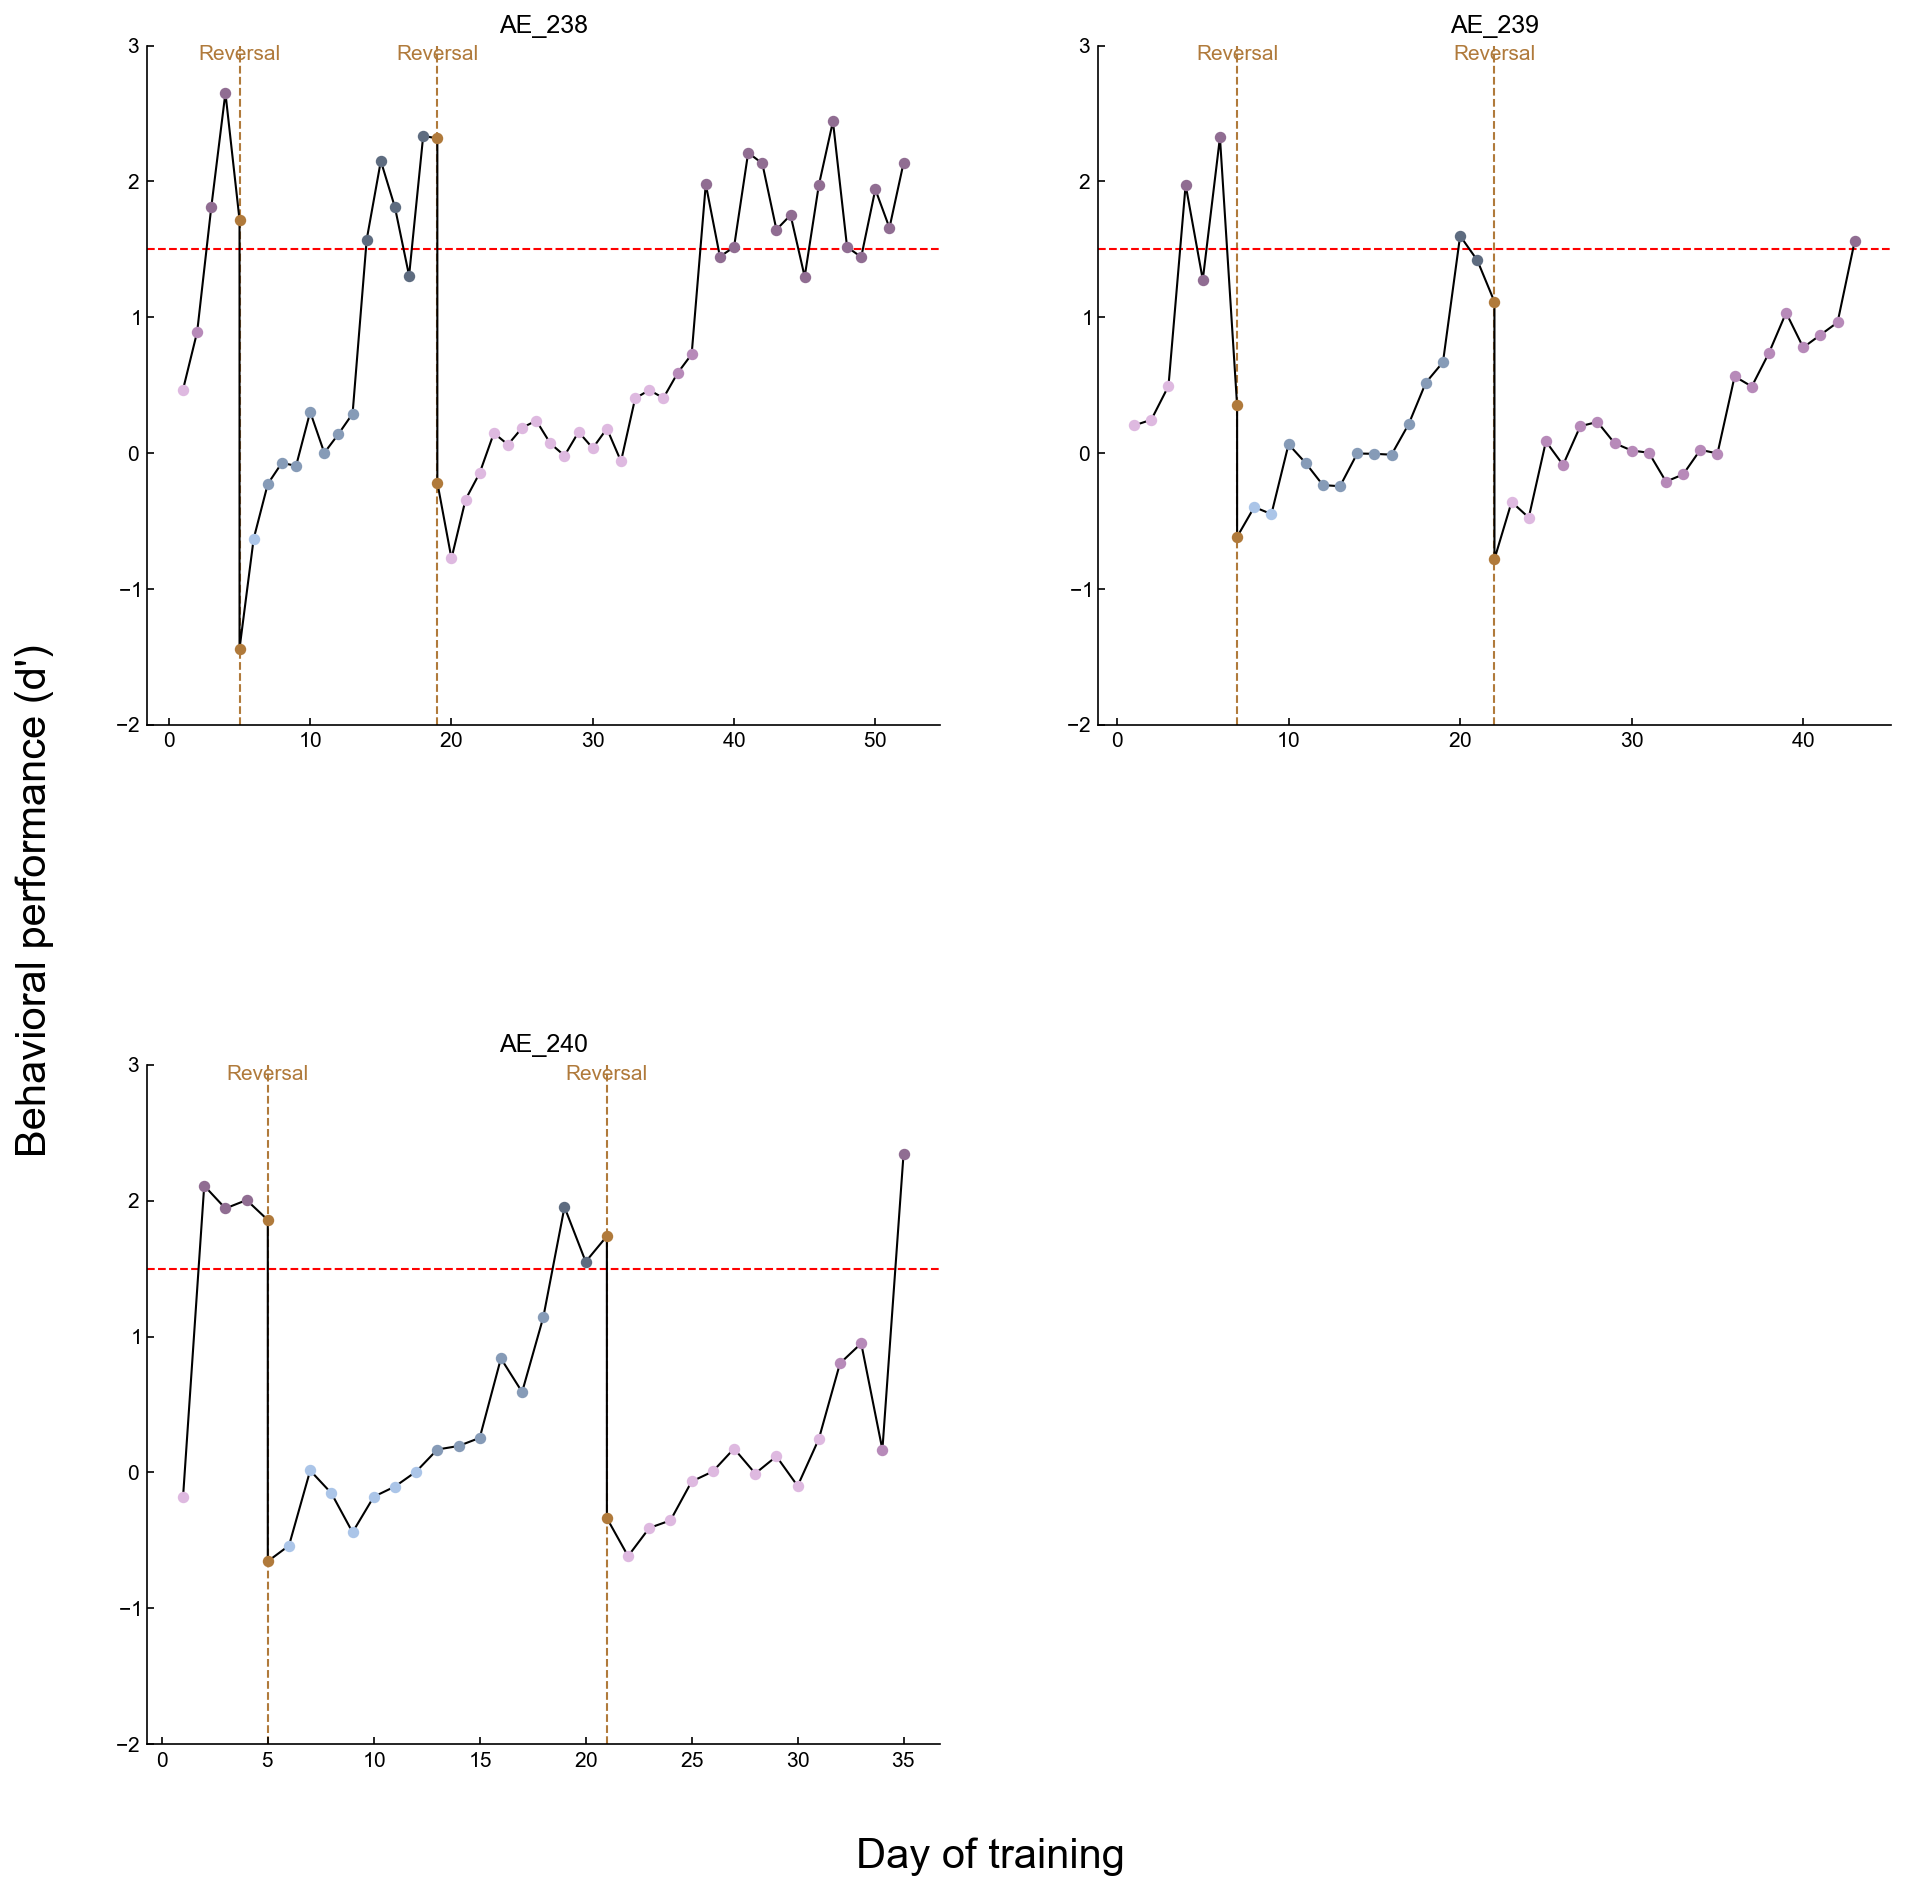

In [3]:
animals = ['AE_238','AE_239','AE_240']
learning_phases,_,_ = ilep.calculateLearningPhasesV2(animals,animalBehaviors,plot=True)

In [4]:
EnumSessionOps = []
EnumClustOps = []
sessions = os.listdir(ops_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in did_not_learn:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionOps.append(session)
        EnumClustOps.append(clust)

100%|██████████| 101/101 [00:00<00:00, 108.17it/s]


In [5]:
EnumSessionControl = []
EnumClustControl = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.task in ['passive no beahvior']:
        continue
    if sessionfile.meta.task in ['tuning nonreversal','tuning switch','tuning reversal']:
        continue
    if sessionfile.meta.region != 'AC':
        continue
        
    if sessionfile.meta.animal not in np.concatenate((dualanimalnames,['DS_15','DS_19'])):#np.concatenate((dualanimalnames,danimals)):
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSessionControl.append(session)
        EnumClustControl.append(clust)

100%|██████████| 592/592 [00:03<00:00, 186.35it/s]


In [6]:
stim_25s_df = pd.read_csv(stim25sdecodingfilename)
stim_25s_opsin_on_df = pd.read_csv(stim25sopsinondecodingfilename)
stim_25s_opsin_off_df = pd.read_csv(stim25sopsinoffdecodingfilename)
choice_df = pd.read_csv(choicedecodingfilename)
choice_opsin_on_df = pd.read_csv(choiceopsinondecodingfilename)
choice_opsin_off_df = pd.read_csv(choiceopsinoffdecodingfilename)
dec_df = pd.concat([stim_25s_df,stim_25s_opsin_on_df,stim_25s_opsin_off_df,choice_df,choice_opsin_on_df,choice_opsin_off_df])

In [7]:
dec_df

,Unnamed: 0,n_rep,categories,session,clust,accuracy,accuracy_std,accuracy_sem,weighted_accuracy,weighted_accuracy_std,weighted_accuracy_sem,shuffled_control_accuracy,shuffled_control_accuracy_std,shuffled_control_accuracy_sem,synthetic_control_accuracy,synthetic_control_accuracy_std,synthetic_control_accuracy_sem,pval_shuffled_control,pval_synthetic_control,fraction_empty_trials
0,0,500,stimulus,BS_108_1_AC.pickle,2,0.553808,0.114438,0.005123,0.547353,0.120158,0.005379,0.498038,0.127026,0.005686,0.497013,0.137073,0.006136,1.704544e-11,2.361652e-11,0.470641
1,1,500,stimulus,BS_108_1_AC.pickle,8,0.738231,0.112711,0.005046,0.757952,0.109867,0.004918,0.499333,0.141019,0.006313,0.490167,0.143965,0.006445,1.287027e-108,8.564994e-112,0.975821
2,2,500,stimulus,BS_108_1_AC.pickle,9,0.553410,0.130132,0.005826,0.565965,0.131121,0.005870,0.506026,0.142207,0.006366,0.486321,0.143079,0.006405,2.889120e-07,6.428806e-14,0.959526
3,3,500,stimulus,BS_108_1_AC.pickle,14,0.533346,0.132353,0.005925,0.547633,0.133809,0.005990,0.496987,0.139155,0.006229,0.493538,0.147219,0.006590,2.299744e-05,1.095431e-05,0.760282
4,4,500,stimulus,BS_108_1_AC.pickle,34,0.625474,0.122615,0.005489,0.633548,0.123970,0.005550,0.497731,0.137979,0.006177,0.498410,0.139467,0.006243,4.990636e-44,1.787233e-43,0.911372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,1793,500,response_off,BS_92_9_opto_AC.pickle,99,0.713996,0.078963,0.003535,0.567266,0.103253,0.004622,0.681510,0.077109,0.003452,0.495897,0.140651,0.006296,7.260218e-09,5.033540e-110,0.733063
1794,1794,500,response_off,BS_92_9_opto_AC.pickle,101,0.703443,0.059745,0.002675,0.501448,0.067813,0.003036,0.725500,0.050006,0.002250,0.502909,0.130063,0.005822,NaN,4.744495e-117,0.891340
1795,1795,500,response_off,BS_92_9_opto_AC.pickle,112,0.716802,0.049807,0.002230,0.493307,0.051982,0.002327,0.720308,0.053040,0.002374,0.509047,0.118342,0.005298,3.793669e-01,5.536471e-133,0.877826
1796,1796,500,response_off,BS_92_9_opto_AC.pickle,142,0.676779,0.065486,0.002932,0.478814,0.067141,0.003006,0.648316,0.087578,0.003921,0.513490,0.112242,0.005025,2.682663e-08,2.287565e-104,0.592723


In [8]:
def getDataPoint(df,session,clust,categories,column):
    df = df[df['session']==session]
    df = df[df['clust']==clust]
    df = df[df['categories']==categories]
    val = list(df[column])
    if len(val) == 1:
        return val[0]
    elif len(val) <= 0:
        return np.nan
    else:
        raise Exception('Incorrent length. Duplicate values')
    
#getDataPoint(dec_df,'BS_108_1_AC.pickle',9,'stimulus','accuracy')

In [9]:
stim_acc_on = []
pval_stim_s_on = []
pval_stim_c_on = []

stim_acc_off = []
pval_stim_s_off = []
pval_stim_c_off = []

stim_acc_control = []
pval_stim_s_control = []
pval_stim_c_control = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    pvalue_stim_c = getDataPoint(dec_df,session,clust,'stimulus_on','pval_shuffled_control')
    stim_acc_on.append(stim_accuracy)
    pval_stim_s_on.append(pvalue_stim_s)
    pval_stim_c_on.append(pvalue_stim_c)
    

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus_off','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus_off','pval_synthetic_control')
    pvalue_stim_c = getDataPoint(dec_df,session,clust,'stimulus_off','pval_shuffled_control')
    stim_acc_off.append(stim_accuracy)
    pval_stim_s_off.append(pvalue_stim_s)
    pval_stim_c_off.append(pvalue_stim_c)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    stim_accuracy = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    pvalue_stim_s = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    pvalue_stim_c = getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    stim_acc_control.append(stim_accuracy)
    pval_stim_s_control.append(pvalue_stim_s)
    pval_stim_c_control.append(pvalue_stim_c)
    
stim_acc_control = np.array(stim_acc_control)
pval_stim_s_control = np.array(pval_stim_s_control)
pval_stim_c_control = np.array(pval_stim_c_control)
stim_acc_on = np.array(stim_acc_on)
pval_stim_s_on = np.array(pval_stim_s_on)
pval_stim_c_on = np.array(pval_stim_c_on)
stim_acc_off = np.array(stim_acc_off)
pval_stim_s_off = np.array(pval_stim_s_off)
pval_stim_c_off = np.array(pval_stim_c_off)

999it [00:03, 279.30it/s]
999it [00:03, 282.46it/s]
1440it [00:05, 282.84it/s]


In [10]:
def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_control,task_encoder_threshold_control = get_TE_mask(stim_acc_control,pval_stim_s_control,pval_stim_c_control)
is_TE_on,task_encoder_threshold_on = get_TE_mask(stim_acc_on,pval_stim_s_on,pval_stim_c_on)
is_TE_off,task_encoder_threshold_off = get_TE_mask(stim_acc_off,pval_stim_s_off,pval_stim_c_off)

Task encoder threshold: 0.5669977035930377
Task encoder threshold: 0.5855125094850949
Task encoder threshold: 0.5822192950725265


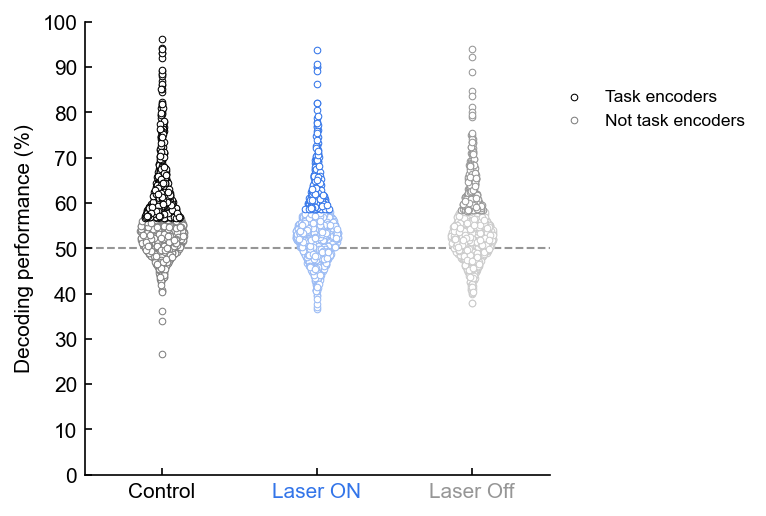

In [11]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(4,4))

X = np.ones_like(stim_acc_control)
_,Y = ilep.violin(X,stim_acc_control)
X,_ = ilep.violin(X,np.log10(stim_acc_control),width=0.35)
size=10
ax.scatter(X[is_TE_control], Y[is_TE_control], s=size, ec='black', fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_control)], Y[np.logical_not(is_TE_control)], s=size, ec=lighten_color('black',0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(stim_acc_on)+1
_,Y = ilep.violin(X,stim_acc_on)
X,_ = ilep.violin(X,np.log10(stim_acc_on),width=0.35)
ax.scatter(X[is_TE_on], Y[is_TE_on], s=size, ec=LASER_COLOR, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_on)], Y[np.logical_not(is_TE_on)], s=size, ec=lighten_color(LASER_COLOR,0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(stim_acc_off)+2
_,Y = ilep.violin(X,stim_acc_off)
X,_ = ilep.violin(X,np.log10(stim_acc_off),width=0.35)
ax.scatter(X[is_TE_off], Y[is_TE_off], s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_off)], Y[np.logical_not(is_TE_off)], s=size, ec=lighten_color(GOOD_GREY,0.5), fc='white', lw=0.5,zorder=0)




ax.set_xlim([0.5,3.5])
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Control','Laser ON','Laser Off'])
colors = ['k',LASER_COLOR,GOOD_GREY]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

ax.set_ylim([0,1])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80','90','100'])

# ax.axhline(task_encoder_threshold_s,linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5,linestyle='--',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5-(task_encoder_threshold_s-0.5),linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# #ax.axhline(np.median(stim_acc[is_TE_s]),xmax=0.5,color='green')

ax.set_ylabel('Decoding performance (%)')
#ax.spines['bottom'].set_visible(False)

ax.axhline(0.5,linestyle='--',color=GOOD_GREY,zorder=-10,lw=1)

ax.scatter([],[], s=size, ec='k', fc='white', lw=0.5,zorder=1,label='Task encoders')
ax.scatter([],[], s=size, ec=lighten_color('k',0.5), fc='white', lw=0.5,zorder=1,label='Not task encoders')
lgd = ax.legend(frameon=False,loc=(1,0.75))

#plt.savefig(os.path.join('D:\\\\TempFigures','Decoding Comparisons','Task encoders schematic inference buffer.pdf'),transparent=False,facecolor="white")
#plt.savefig(os.path.join('D:\\\\TempFigures','Decoding Comparisons','Task encoders schematic old decoding.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [19]:
dec_values_control = ilep.rmnan(stim_acc_control)
dec_values_on = ilep.rmnan(stim_acc_on)
dec_values_off = ilep.rmnan(stim_acc_off)

pval_on_control = mannwhitneyu(dec_values_control,dec_values_on).pvalue
pval_off_control = mannwhitneyu(dec_values_control,dec_values_off).pvalue
pval_on_off = mannwhitneyu(dec_values_on,dec_values_off).pvalue

print(f"on-control = {pval_on_control}, off-control = {pval_off_control}, on-off = {pval_on_off}")

on-control = 9.004460076688223e-08, off-control = 1.9078839218276444e-06, on-off = 0.5553703003897252


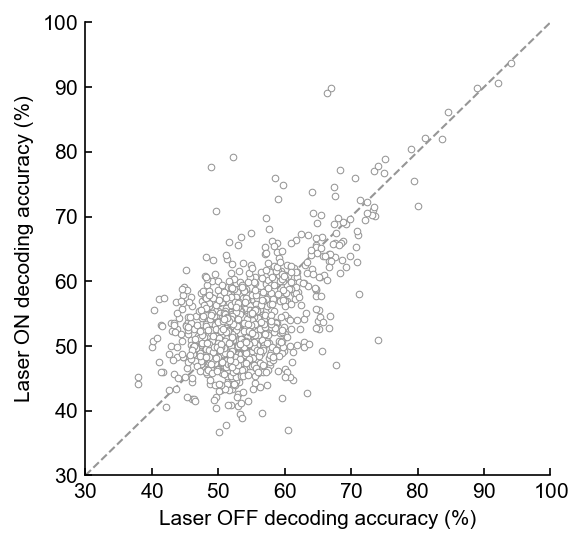

In [79]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(stim_acc_off*100,stim_acc_on*100,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
ax.plot([30,100],[30,100],linestyle='--',lw=1,color=GOOD_GREY,zorder=-10)

ax.set_xlim([30,100])
ax.set_ylim([30,100])

ax.set_xlabel('Laser OFF decoding accuracy (%)')
ax.set_ylabel('Laser ON decoding accuracy (%)')

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin decoding on vs off.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin decoding on vs off.png'),transparent=False,facecolor="white")

In [80]:
did_not_learn

['BS_86', 'BS_100', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_163', 'BS_174']

In [81]:
animalBehaviors['BS_86'].cloudiness

19

In [102]:
n_animals_per_day_opsin = np.zeros(30)
n_animals_per_day_control = np.zeros(30)
dec_per_day_on = dict()
for idx in range(30):
    dec_per_day_on[idx] = []
dec_per_day_off = dict()
for idx in range(30):
    dec_per_day_off[idx] = []
dec_per_day_control = dict()
for idx in range(30):
    dec_per_day_control[idx] = []

    
for animal in did_not_learn:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_opsin[day-animalBehaviors[animal].reversal] += 1

for animal in dualanimalnames:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_control[day-animalBehaviors[animal].reversal] += 1
        
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    acc_on = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    acc_off = getDataPoint(dec_df,session,clust,'stimulus_off','weighted_accuracy')
    
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    dec_per_day_on[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_on)
    dec_per_day_off[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_off)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    acc_control = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    dec_per_day_control[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_control)

999it [00:17, 55.61it/s] 
2110it [00:14, 141.05it/s]


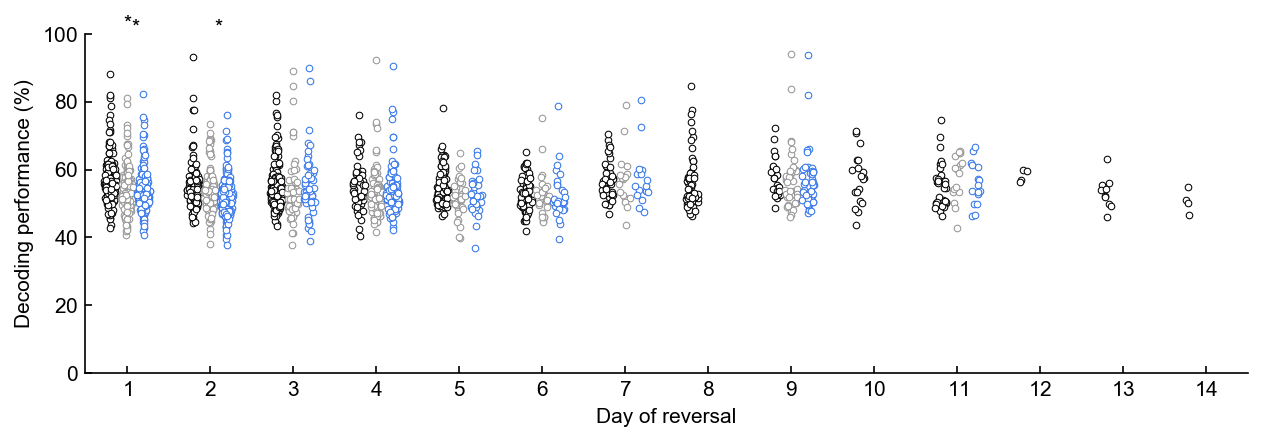

In [147]:
fig, ax = plt.subplots(figsize=(10,3))

for day_idx in range(len(n_animals_per_day)):
    
    X = np.zeros_like(dec_per_day_control[day_idx])+day_idx
    _,Y = ilep.violin(X,dec_per_day_control[day_idx])
    X,_ = ilep.violin(X,np.log10(dec_per_day_control[day_idx]),width=0.2)
    X -= 0.2
    Y *= 100
    ax.scatter(X,Y,s=10,fc='white',ec='k',lw=0.5)
    
    X = np.zeros_like(dec_per_day_off[day_idx])+day_idx
    _,Y = ilep.violin(X,dec_per_day_off[day_idx])
    X,_ = ilep.violin(X,np.log10(dec_per_day_off[day_idx]),width=0.2)
    Y *= 100
    ax.scatter(X,Y,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
    
    X = np.zeros_like(dec_per_day_on[day_idx])+day_idx
    _,Y = ilep.violin(X,dec_per_day_on[day_idx])
    X,_ = ilep.violin(X,np.log10(dec_per_day_on[day_idx]),width=0.2)
    X += 0.2
    Y *= 100
    ax.scatter(X,Y,s=10,fc='white',ec=LASER_COLOR,lw=0.5)
    
ax.text(1,100,'*',horizontalalignment='center',verticalalignment='bottom')
ax.text(1+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

ax.text(2+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([0,100])
ax.set_ylabel('Decoding performance (%)')

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin decoding over days.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin decoding over days.png'),transparent=False,facecolor="white")

In [110]:
days_to_check = []
for day in range(1,14+1):
    if len(dec_per_day_on[day]) > 0 and len(dec_per_day_off[day]) > 0 and len(dec_per_day_control[day]) > 0:
        days_to_check.append(day)

print(days_to_check)

[1, 2, 3, 4, 5, 6, 7, 9, 11]


In [140]:
day = np.concatenate([np.concatenate([len(dec_per_day_on[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_off[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_control[day])*[str(day)] for day in days_to_check])])

context = np.concatenate([np.concatenate([len(dec_per_day_on[day])*['opsin_on'] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_off[day])*['opsin_off'] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_control[day])*['control'] for day in days_to_check])])

dec = np.concatenate([np.concatenate([dec_per_day_on[day] for day in days_to_check]),
                    np.concatenate([dec_per_day_off[day] for day in days_to_check]),
                    np.concatenate([dec_per_day_control[day] for day in days_to_check])])

df = pd.DataFrame({"day": day, "context": context, "dec": dec})
print(df)

### Anova ###
anova = pg.anova(data=df, dv='dec', between=['day','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='dec', between=['day','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "day * context"][["day","A", "B", "p-unc", "p-corr", "hedges"]])

     day   context       dec
0      1  opsin_on  0.426613
1      1  opsin_on  0.482168
2      1  opsin_on  0.516076
3      1  opsin_on  0.521747
4      1  opsin_on  0.536725
...   ..       ...       ...
1777  11   control  0.462973
1778  11   control  0.664868
1779  11   control  0.504775
1780  11   control  0.492695
1781  11   control  0.506765

[1782 rows x 3 columns]
          Source        SS      DF        MS          F         p-unc  \
0            day  0.251761     8.0  0.031470   6.191192  6.589432e-08   
1        context  0.140218     2.0  0.070109  13.792711  1.140521e-06   
2  day * context  0.101539    16.0  0.006346   1.248497  2.228554e-01   
3       Residual  8.803839  1732.0  0.005083        NaN           NaN   

        np2  
0  0.027802  
1  0.015677  
2  0.011402  
3       NaN  

   day          A          B     p-unc    p-corr    hedges
39   1    control  opsin_off  0.000054  0.000723  0.493236
40   1    control   opsin_on  0.000214  0.001922  0.455445
41   1  opsin

In [ ]:
day = np.concatenate(([np.concatenate((len(dec_per_day_on[day])*[str(day)])) for day in days_to_check],
                    [np.concatenate((len(dec_per_day_off[day])*[str(day)])) for day in days_to_check],
                    [np.concatenate((len(dec_per_day_control[day])*[str(day)])) for day in days_to_check]))

In [131]:
np.concatenate([len(dec_per_day_on[day])*[str(day)] for day in days_to_check])

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

# %TE over days (Opsin vs control)

In [49]:
n_animals_per_day_opsin = np.zeros(30)
n_animals_per_day_control = np.zeros(30)
te_per_day_on = dict()
for idx in range(30):
    te_per_day_on[idx] = []
te_per_day_off = dict()
for idx in range(30):
    te_per_day_off[idx] = []
te_per_day_control = dict()
for idx in range(30):
    te_per_day_control[idx] = []

    
for animal in did_not_learn:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_opsin[day-animalBehaviors[animal].reversal] += 1

for animal in dualanimalnames:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_control[day-animalBehaviors[animal].reversal] += 1
        
        
        
        
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    acc_on = getDataPoint(dec_df,session,clust,'stimulus_on','weighted_accuracy')
    pval_c_on = getDataPoint(dec_df,session,clust,'stimulus_on','pval_shuffled_control')
    pval_s_on = getDataPoint(dec_df,session,clust,'stimulus_on','pval_synthetic_control')
    TE_on = False
    if np.isfinite(acc_on) and acc_on >= task_encoder_threshold_on and pval_c_on <= 0.05 and pval_s_on <= 0.05:
        TE_on = True
    
    acc_off = getDataPoint(dec_df,session,clust,'stimulus_off','weighted_accuracy')
    pval_c_off = getDataPoint(dec_df,session,clust,'stimulus_off','pval_shuffled_control')
    pval_s_off = getDataPoint(dec_df,session,clust,'stimulus_off','pval_synthetic_control')
    TE_off = False
    if np.isfinite(acc_off) and acc_off >= task_encoder_threshold_off and pval_c_off <= 0.05 and pval_s_off <= 0.05:
        TE_off = True
    
    if np.isnan(acc_on) or np.isnan(acc_off):
        continue
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    te_per_day_on[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_on)
    te_per_day_off[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_off)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    acc_control = getDataPoint(dec_df,session,clust,'stimulus','weighted_accuracy')
    pval_c_control = getDataPoint(dec_df,session,clust,'stimulus','pval_shuffled_control')
    pval_s_control = getDataPoint(dec_df,session,clust,'stimulus','pval_synthetic_control')
    TE_control = False
    if np.isfinite(acc_control) and acc_control >= task_encoder_threshold_control and pval_c_control <= 0.05 and pval_s_control <= 0.05:
        TE_control = True
    
    if np.isnan(acc_control):
        continue
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    te_per_day_control[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_control)

999it [00:24, 40.70it/s]
1440it [00:14, 96.71it/s] 


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_method

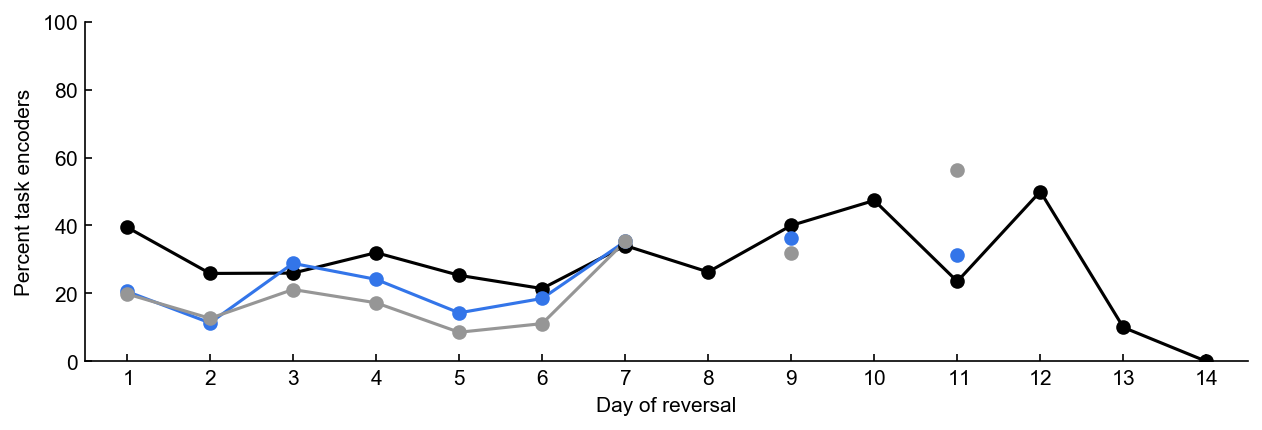

In [50]:
fig, ax = plt.subplots(figsize=(10,3))

X = np.array(range(len(te_per_day_control)))

Y_control = [np.mean(te_per_day_control[y])*100 for y in te_per_day_control]
ax.plot(X,Y_control,color='k',zorder=-1)
ax.scatter(X,Y_control,color='k',label='control')

Y_on = [np.mean(te_per_day_on[y])*100 for y in te_per_day_on]
ax.plot(X,Y_on,color=LASER_COLOR,zorder=-1)
ax.scatter(X,Y_on,color=LASER_COLOR,label='laser ON')

Y_off = [np.mean(te_per_day_off[y])*100 for y in te_per_day_off]
ax.plot(X,Y_off,color=GOOD_GREY,zorder=-1)
ax.scatter(X,Y_off,color=GOOD_GREY,label='laser OFF')
    
# ax.text(1,100,'*',horizontalalignment='center',verticalalignment='bottom')
# ax.text(1+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

# ax.text(2+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([0,100])
ax.set_ylabel('Percent task encoders')

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders over days.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders over days.png'),transparent=False,facecolor="white")

# Opsin Choice Decoding -- Unweighted

In [20]:
choice_acc_on = []
pval_choice_s_on = []
pval_choice_c_on = []

choice_acc_off = []
pval_choice_s_off = []
pval_choice_c_off = []

choice_acc_control = []
pval_choice_s_control = []
pval_choice_c_control = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response_on','accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response_on','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response_on','pval_shuffled_control')
    choice_acc_on.append(choice_accuracy)
    pval_choice_s_on.append(pvalue_choice_s)
    pval_choice_c_on.append(pvalue_choice_c)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response_off','accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response_off','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response_off','pval_shuffled_control')
    choice_acc_off.append(choice_accuracy)
    pval_choice_s_off.append(pvalue_choice_s)
    pval_choice_c_off.append(pvalue_choice_c)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    choice_acc_control.append(choice_accuracy)
    pval_choice_s_control.append(pvalue_choice_s)
    pval_choice_c_control.append(pvalue_choice_c)
    
choice_acc_control = np.array(choice_acc_control)
pval_choice_s_control = np.array(pval_choice_s_control)
pval_choice_c_control = np.array(pval_choice_c_control)
choice_acc_on = np.array(choice_acc_on)
pval_choice_s_on = np.array(pval_choice_s_on)
pval_choice_c_on = np.array(pval_choice_c_on)
choice_acc_off = np.array(choice_acc_off)
pval_choice_s_off = np.array(pval_choice_s_off)
pval_choice_c_off = np.array(pval_choice_c_off)

999it [00:03, 282.57it/s]
999it [00:03, 281.30it/s]
1440it [00:05, 284.10it/s]


In [21]:
def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_control,task_encoder_threshold_control = get_TE_mask(choice_acc_control,pval_choice_s_control,pval_choice_c_control)
is_TE_on,task_encoder_threshold_on = get_TE_mask(choice_acc_on,pval_choice_s_on,pval_choice_c_on)
is_TE_off,task_encoder_threshold_off = get_TE_mask(choice_acc_off,pval_choice_s_off,pval_choice_c_off)

Task encoder threshold: 0.5748461538461538
Task encoder threshold: 0.5587717391304348
Task encoder threshold: 0.6321111111111111


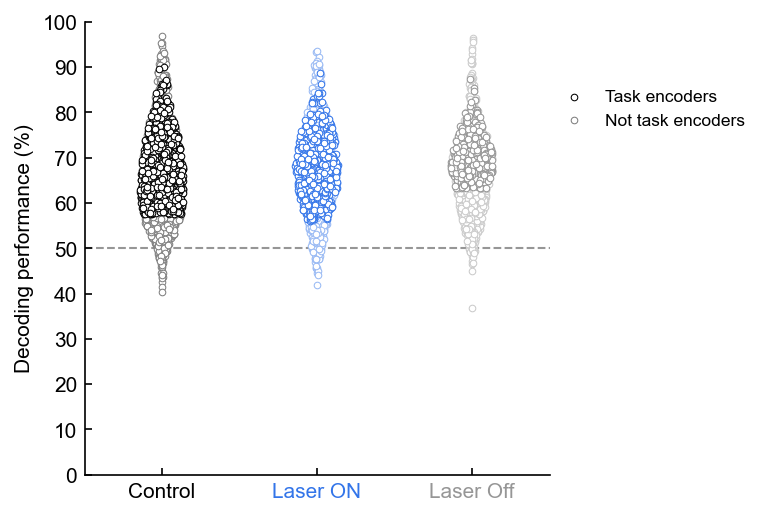

In [22]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(4,4))

X = np.ones_like(choice_acc_control)
_,Y = ilep.violin(X,choice_acc_control)
X,_ = ilep.violin(X,np.log10(choice_acc_control),width=0.35)
size=10
ax.scatter(X[is_TE_control], Y[is_TE_control], s=size, ec='black', fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_control)], Y[np.logical_not(is_TE_control)], s=size, ec=lighten_color('black',0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(choice_acc_on)+1
_,Y = ilep.violin(X,choice_acc_on)
X,_ = ilep.violin(X,np.log10(choice_acc_on),width=0.35)
ax.scatter(X[is_TE_on], Y[is_TE_on], s=size, ec=LASER_COLOR, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_on)], Y[np.logical_not(is_TE_on)], s=size, ec=lighten_color(LASER_COLOR,0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(choice_acc_off)+2
_,Y = ilep.violin(X,choice_acc_off)
X,_ = ilep.violin(X,np.log10(choice_acc_off),width=0.35)
ax.scatter(X[is_TE_off], Y[is_TE_off], s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_off)], Y[np.logical_not(is_TE_off)], s=size, ec=lighten_color(GOOD_GREY,0.5), fc='white', lw=0.5,zorder=0)




ax.set_xlim([0.5,3.5])
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Control','Laser ON','Laser Off'])
colors = ['k',LASER_COLOR,GOOD_GREY]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

ax.set_ylim([0,1])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80','90','100'])

# ax.axhline(task_encoder_threshold_s,linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5,linestyle='--',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5-(task_encoder_threshold_s-0.5),linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# #ax.axhline(np.median(stim_acc[is_TE_s]),xmax=0.5,color='green')

ax.set_ylabel('Decoding performance (%)')
#ax.spines['bottom'].set_visible(False)

ax.axhline(0.5,linestyle='--',color=GOOD_GREY,zorder=-10,lw=1)

ax.scatter([],[], s=size, ec='k', fc='white', lw=0.5,zorder=1,label='Task encoders')
ax.scatter([],[], s=size, ec=lighten_color('k',0.5), fc='white', lw=0.5,zorder=1,label='Not task encoders')
lgd = ax.legend(frameon=False,loc=(1,0.75))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic unweighted.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic unweighted.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [23]:
dec_values_control = ilep.rmnan(choice_acc_control)
dec_values_on = ilep.rmnan(choice_acc_on)
dec_values_off = ilep.rmnan(choice_acc_off)

pval_on_control = mannwhitneyu(dec_values_control,dec_values_on).pvalue
pval_off_control = mannwhitneyu(dec_values_control,dec_values_off).pvalue
pval_on_off = mannwhitneyu(dec_values_on,dec_values_off).pvalue

print(f"on-control = {pval_on_control}, off-control = {pval_off_control}, on-off = {pval_on_off}")

on-control = 0.003676047255203243, off-control = 0.00256224917176299, on-off = 0.9444550984309324


# Opsin Choice Decoding -- Weighted

In [25]:
choice_acc_on = []
pval_choice_s_on = []
pval_choice_c_on = []

choice_acc_off = []
pval_choice_s_off = []
pval_choice_c_off = []

choice_acc_control = []
pval_choice_s_control = []
pval_choice_c_control = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response_on','weighted_accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response_on','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response_on','pval_shuffled_control')
    choice_acc_on.append(choice_accuracy)
    pval_choice_s_on.append(pvalue_choice_s)
    pval_choice_c_on.append(pvalue_choice_c)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response_off','weighted_accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response_off','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response_off','pval_shuffled_control')
    choice_acc_off.append(choice_accuracy)
    pval_choice_s_off.append(pvalue_choice_s)
    pval_choice_c_off.append(pvalue_choice_c)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    choice_accuracy = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    pvalue_choice_s = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    pvalue_choice_c = getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    choice_acc_control.append(choice_accuracy)
    pval_choice_s_control.append(pvalue_choice_s)
    pval_choice_c_control.append(pvalue_choice_c)
    
choice_acc_control = np.array(choice_acc_control)
pval_choice_s_control = np.array(pval_choice_s_control)
pval_choice_c_control = np.array(pval_choice_c_control)
choice_acc_on = np.array(choice_acc_on)
pval_choice_s_on = np.array(pval_choice_s_on)
pval_choice_c_on = np.array(pval_choice_c_on)
choice_acc_off = np.array(choice_acc_off)
pval_choice_s_off = np.array(pval_choice_s_off)
pval_choice_c_off = np.array(pval_choice_c_off)

999it [00:03, 280.79it/s]
999it [00:03, 282.96it/s]
1440it [00:05, 281.23it/s]


In [26]:
def get_TE_mask(acc,pval_s,pval_c):
    low_decoders = np.less(acc,0.5)
    low_accuracies = acc[low_decoders]
    low_magnitudes = np.absolute(low_accuracies-0.5)

    low_magnitudes = np.sort(low_magnitudes)
    task_encoder_threshold = 0.5+low_magnitudes[int(0.95 * len(low_magnitudes))]
    print('Task encoder threshold: '+str(task_encoder_threshold))

    is_finite = np.isfinite(acc)
    is_valid_pval = np.logical_and(np.less(pval_s,0.05) , np.less(pval_c,0.05))
    is_TE = np.greater_equal(acc,task_encoder_threshold)
    is_TE = np.logical_and(is_TE,is_finite)
    is_TE = np.logical_and(is_TE,is_valid_pval)
    return is_TE,task_encoder_threshold

is_TE_control,task_encoder_threshold_control = get_TE_mask(choice_acc_control,pval_choice_s_control,pval_choice_c_control)
is_TE_on,task_encoder_threshold_on = get_TE_mask(choice_acc_on,pval_choice_s_on,pval_choice_c_on)
is_TE_off,task_encoder_threshold_off = get_TE_mask(choice_acc_off,pval_choice_s_off,pval_choice_c_off)

Task encoder threshold: 0.5790359432234433
Task encoder threshold: 0.5777153605015675
Task encoder threshold: 0.5814711448764066


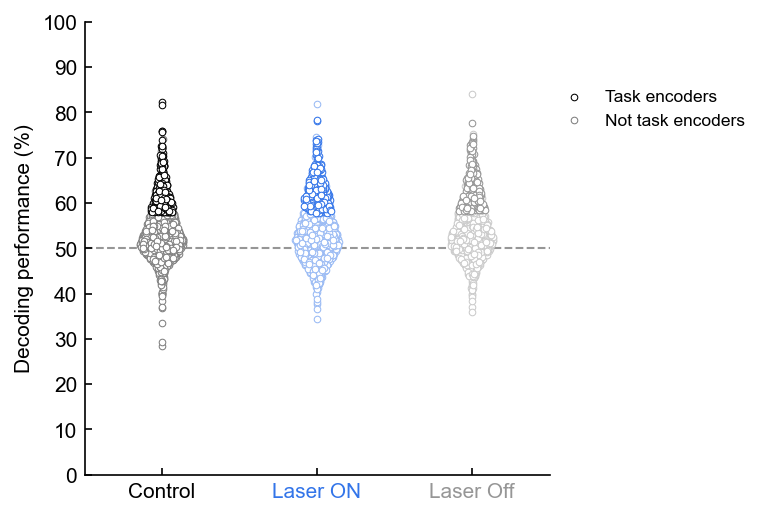

In [27]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(4,4))

X = np.ones_like(choice_acc_control)
_,Y = ilep.violin(X,choice_acc_control)
X,_ = ilep.violin(X,np.log10(choice_acc_control),width=0.35)
size=10
ax.scatter(X[is_TE_control], Y[is_TE_control], s=size, ec='black', fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_control)], Y[np.logical_not(is_TE_control)], s=size, ec=lighten_color('black',0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(choice_acc_on)+1
_,Y = ilep.violin(X,choice_acc_on)
X,_ = ilep.violin(X,np.log10(choice_acc_on),width=0.35)
ax.scatter(X[is_TE_on], Y[is_TE_on], s=size, ec=LASER_COLOR, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_on)], Y[np.logical_not(is_TE_on)], s=size, ec=lighten_color(LASER_COLOR,0.5), fc='white', lw=0.5,zorder=0)

X = np.ones_like(choice_acc_off)+2
_,Y = ilep.violin(X,choice_acc_off)
X,_ = ilep.violin(X,np.log10(choice_acc_off),width=0.35)
ax.scatter(X[is_TE_off], Y[is_TE_off], s=size, ec=GOOD_GREY, fc='white', lw=0.5,zorder=1)
ax.scatter(X[np.logical_not(is_TE_off)], Y[np.logical_not(is_TE_off)], s=size, ec=lighten_color(GOOD_GREY,0.5), fc='white', lw=0.5,zorder=0)




ax.set_xlim([0.5,3.5])
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Control','Laser ON','Laser Off'])
colors = ['k',LASER_COLOR,GOOD_GREY]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

ax.set_ylim([0,1])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80','90','100'])

# ax.axhline(task_encoder_threshold_s,linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5,linestyle='--',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# ax.axhline(0.5-(task_encoder_threshold_s-0.5),linestyle='-',color='grey',zorder=-10,lw=0.5,xmax=0.5)
# #ax.axhline(np.median(stim_acc[is_TE_s]),xmax=0.5,color='green')

ax.set_ylabel('Decoding performance (%)')
#ax.spines['bottom'].set_visible(False)

ax.axhline(0.5,linestyle='--',color=GOOD_GREY,zorder=-10,lw=1)

ax.scatter([],[], s=size, ec='k', fc='white', lw=0.5,zorder=1,label='Task encoders')
ax.scatter([],[], s=size, ec=lighten_color('k',0.5), fc='white', lw=0.5,zorder=1,label='Not task encoders')
lgd = ax.legend(frameon=False,loc=(1,0.75))

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic weighted.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin task encoders schematic weighted.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [41]:
n_animals_per_day_opsin = np.zeros(30)
n_animals_per_day_control = np.zeros(30)
dec_per_day_on = dict()
for idx in range(30):
    dec_per_day_on[idx] = []
dec_per_day_off = dict()
for idx in range(30):
    dec_per_day_off[idx] = []
dec_per_day_control = dict()
for idx in range(30):
    dec_per_day_control[idx] = []

    
for animal in did_not_learn:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_opsin[day-animalBehaviors[animal].reversal] += 1

for animal in dualanimalnames:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_control[day-animalBehaviors[animal].reversal] += 1
        
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    acc_on = getDataPoint(dec_df,session,clust,'response_on','weighted_accuracy')
    acc_off = getDataPoint(dec_df,session,clust,'response_off','weighted_accuracy')
    
    if np.isnan(acc_on):
        continue
    if np.isnan(acc_off):
        continue
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    dec_per_day_on[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_on)
    dec_per_day_off[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_off)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    acc_control = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    
    if np.isnan(acc_control):
        continue
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    dec_per_day_control[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(acc_control)

999it [00:19, 51.96it/s] 
1440it [00:11, 126.30it/s]


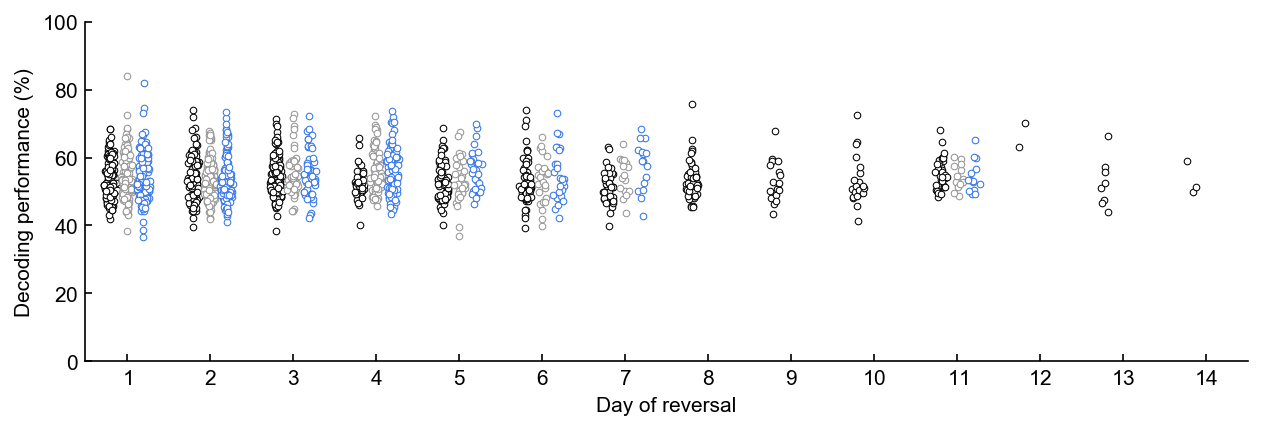

In [42]:
fig, ax = plt.subplots(figsize=(10,3))

for day_idx in range(len(n_animals_per_day_control)):
    
    data = dec_per_day_control[day_idx]
    if np.sum(np.isfinite(data) > 0):
        X = np.zeros_like(data)+day_idx
        _,Y = ilep.violin(X,data)
        X,_ = ilep.violin(X,np.log10(data),width=0.2)
        X -= 0.2
        Y *= 100
        ax.scatter(X,Y,s=10,fc='white',ec='k',lw=0.5)
    
    data = dec_per_day_off[day_idx]
    if np.sum(np.isfinite(data) > 0):
        X = np.zeros_like(data)+day_idx
        _,Y = ilep.violin(X,data)
        X,_ = ilep.violin(X,np.log10(data),width=0.2)
        Y *= 100
        ax.scatter(X,Y,s=10,fc='white',ec=GOOD_GREY,lw=0.5)
    
    data = dec_per_day_on[day_idx]
    if np.sum(np.isfinite(data) > 0):
        X = np.zeros_like(data)+day_idx
        _,Y = ilep.violin(X,data)
        X,_ = ilep.violin(X,np.log10(data),width=0.2)
        X += 0.2
        Y *= 100
        ax.scatter(X,Y,s=10,fc='white',ec=LASER_COLOR,lw=0.5)
    
ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([0,100])
ax.set_ylabel('Decoding performance (%)')

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin choice decoding over days.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin choice decoding over days.png'),transparent=False,facecolor="white")

In [43]:
days_to_check = []
for day in range(1,14+1):
    if len(dec_per_day_on[day]) > 0 and len(dec_per_day_off[day]) > 0 and len(dec_per_day_control[day]) > 0:
        days_to_check.append(day)

print(days_to_check)

[1, 2, 3, 4, 5, 6, 7, 11]


In [44]:
day = np.concatenate([np.concatenate([len(dec_per_day_on[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_off[day])*[str(day)] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_control[day])*[str(day)] for day in days_to_check])])

context = np.concatenate([np.concatenate([len(dec_per_day_on[day])*['opsin_on'] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_off[day])*['opsin_off'] for day in days_to_check]),
                    np.concatenate([len(dec_per_day_control[day])*['control'] for day in days_to_check])])

dec = np.concatenate([np.concatenate([dec_per_day_on[day] for day in days_to_check]),
                    np.concatenate([dec_per_day_off[day] for day in days_to_check]),
                    np.concatenate([dec_per_day_control[day] for day in days_to_check])])

df = pd.DataFrame({"day": day, "context": context, "dec": dec})
print(df)

### Anova ###
anova = pg.anova(data=df, dv='dec', between=['day','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='dec', between=['day','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "day * context"][["day","A", "B", "p-unc", "p-corr", "hedges"]])

     day   context       dec
0      1  opsin_on  0.481350
1      1  opsin_on  0.606734
2      1  opsin_on  0.519982
3      1  opsin_on  0.529159
4      1  opsin_on  0.497622
...   ..       ...       ...
1462  11   control  0.580807
1463  11   control  0.598759
1464  11   control  0.494528
1465  11   control  0.613031
1466  11   control  0.494066

[1467 rows x 3 columns]
          Source        SS      DF        MS         F     p-unc       np2
0            day  0.056856     7.0  0.008122  2.002943  0.051591  0.009623
1        context  0.039630     2.0  0.019815  4.886323  0.007675  0.006727
2  day * context  0.096956    14.0  0.006925  1.707795  0.048280  0.016299
3       Residual  5.851649  1443.0  0.004055       NaN       NaN       NaN

   day          A          B     p-unc    p-corr    hedges
31   1    control  opsin_off  0.333519  0.727679 -0.165605
32   1    control   opsin_on  0.642607  0.811714 -0.098050
33   1  opsin_off   opsin_on  0.640463  0.811714  0.056998
34  11    contr

In [51]:
n_animals_per_day_opsin = np.zeros(30)
n_animals_per_day_control = np.zeros(30)
te_per_day_on = dict()
for idx in range(30):
    te_per_day_on[idx] = []
te_per_day_off = dict()
for idx in range(30):
    te_per_day_off[idx] = []
te_per_day_control = dict()
for idx in range(30):
    te_per_day_control[idx] = []

    
for animal in did_not_learn:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_opsin[day-animalBehaviors[animal].reversal] += 1

for animal in dualanimalnames:
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    for day in days:
        n_animals_per_day_control[day-animalBehaviors[animal].reversal] += 1
        
        
        
        
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionOps,EnumClustOps))):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    
    acc_on = getDataPoint(dec_df,session,clust,'response_on','weighted_accuracy')
    pval_c_on = getDataPoint(dec_df,session,clust,'response_on','pval_shuffled_control')
    pval_s_on = getDataPoint(dec_df,session,clust,'response_on','pval_synthetic_control')
    TE_on = False
    if np.isfinite(acc_on) and acc_on >= task_encoder_threshold_on and pval_c_on <= 0.05 and pval_s_on <= 0.05:
        TE_on = True
    
    acc_off = getDataPoint(dec_df,session,clust,'response_off','weighted_accuracy')
    pval_c_off = getDataPoint(dec_df,session,clust,'response_off','pval_shuffled_control')
    pval_s_off = getDataPoint(dec_df,session,clust,'response_off','pval_synthetic_control')
    TE_off = False
    if np.isfinite(acc_off) and acc_off >= task_encoder_threshold_off and pval_c_off <= 0.05 and pval_s_off <= 0.05:
        TE_off = True
    
    if np.isnan(acc_on) or np.isnan(acc_off):
        continue
    animal = sessionfile.meta.animal
    if animal not in did_not_learn:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = min(animalBehaviors[animal].cloudiness-1,np.max([d for d in animalBehaviors[animal].sessions]))
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    te_per_day_on[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_on)
    te_per_day_off[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_off)
    
for idx,(session,clust) in tqdm(enumerate(zip(EnumSessionControl,EnumClustControl))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    acc_control = getDataPoint(dec_df,session,clust,'response','weighted_accuracy')
    pval_c_control = getDataPoint(dec_df,session,clust,'response','pval_shuffled_control')
    pval_s_control = getDataPoint(dec_df,session,clust,'response','pval_synthetic_control')
    TE_control = False
    if np.isfinite(acc_control) and acc_control >= task_encoder_threshold_control and pval_c_control <= 0.05 and pval_s_control <= 0.05:
        TE_control = True
    
    if np.isnan(acc_control):
        continue
    animal = sessionfile.meta.animal
    if animal not in dualanimalnames:
        continue
    first_day_of_analysis = animalBehaviors[animal].reversal+1
    last_day_of_analysis = np.max([d for d in animalBehaviors[animal].sessions])
    
    days = list(range(first_day_of_analysis,last_day_of_analysis+1))
    if sessionfile.meta.day_of_training not in days:
        continue
        
    te_per_day_control[sessionfile.meta.day_of_training-animalBehaviors[animal].reversal].append(TE_control)

999it [00:24, 40.61it/s]
1440it [00:14, 97.74it/s] 


C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\_method

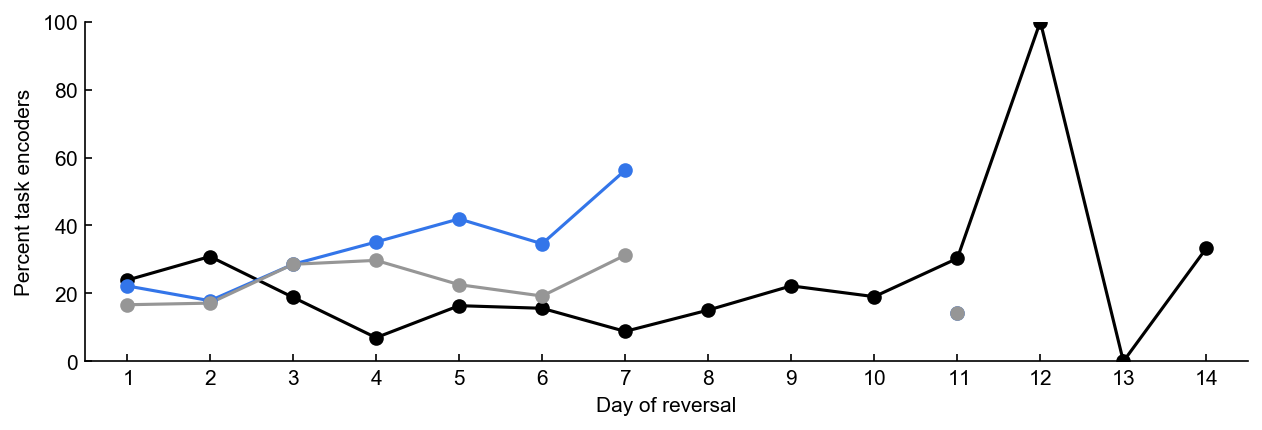

In [52]:
fig, ax = plt.subplots(figsize=(10,3))

X = np.array(range(len(te_per_day_control)))

Y_control = [np.mean(te_per_day_control[y])*100 for y in te_per_day_control]
ax.plot(X,Y_control,color='k',zorder=-1)
ax.scatter(X,Y_control,color='k',label='control')

Y_on = [np.mean(te_per_day_on[y])*100 for y in te_per_day_on]
ax.plot(X,Y_on,color=LASER_COLOR,zorder=-1)
ax.scatter(X,Y_on,color=LASER_COLOR,label='laser ON')

Y_off = [np.mean(te_per_day_off[y])*100 for y in te_per_day_off]
ax.plot(X,Y_off,color=GOOD_GREY,zorder=-1)
ax.scatter(X,Y_off,color=GOOD_GREY,label='laser OFF')
    
# ax.text(1,100,'*',horizontalalignment='center',verticalalignment='bottom')
# ax.text(1+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

# ax.text(2+0.1,99,'*',horizontalalignment='center',verticalalignment='bottom')

ax.set_xlim([0.5,14.5])
ax.set_xticks(range(1,14+1))
ax.set_xlabel('Day of reversal')

ax.set_ylim([0,100])
ax.set_ylabel('Percent task encoders')

plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin choice task encoders over days.pdf'),transparent=False,facecolor="white")
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin choice task encoders over days.png'),transparent=False,facecolor="white")

# Opsin target / non-target lick rate analysis

In [88]:
lick_rate_11kHz_off = []
lick_rate_5kHz_off = []
lick_rate_11kHz_on = []
lick_rate_5kHz_on = []
lick_rate_11kHz_control = []
lick_rate_5kHz_control = []

with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
                trialsPerDayLoaded = pickle.load(f)
        
for animal in dualanimalnames:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes = outcomes[trialsActive]
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes,1))
        miss = np.sum(np.equal(outcomes,2))
        falarm = np.sum(np.equal(outcomes,3))
        creject = np.sum(np.equal(outcomes,4))
        
        lick_rate_11kHz = falarm / (falarm + creject)
        lick_rate_5kHz = hit / (hit + miss)
        
        lick_rate_11kHz_control.append(lick_rate_11kHz)
        lick_rate_5kHz_control.append(lick_rate_5kHz)
        
for animal in did_not_learn:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        laser_on = np.where(animalBehaviors[animal].sessions[session].laser)[0]
        laser_off = np.where(np.logical_not(animalBehaviors[animal].sessions[session].laser))[0]
        
#         print(f"outcomes = {outcomes}")
#         print(f"active = {trialsPerDayLoaded[animal][session]}")
#         print(f"on = {laser_on}")
#         print(f"off = {laser_off}")
        
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes_on_mask = laser_on[np.isin(laser_on,trialsActive)]
        outcomes_off_mask = laser_off[np.isin(laser_off,trialsActive)]
        
#         print(f"on_mask = {outcomes_on_mask}")
#         print(f"off_mask = {outcomes_off_mask}")
        
        outcomes_on = outcomes[outcomes_on_mask]
        outcomes_off = outcomes[outcomes_off_mask]
        
#         print(f"outcomes_on = {outcomes_on}")
#         print(f"outcomes_off = {outcomes_off}")
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_on,1))
        miss = np.sum(np.equal(outcomes_on,2))
        falarm = np.sum(np.equal(outcomes_on,3))
        creject = np.sum(np.equal(outcomes_on,4))
        this_lick_rate_11kHz_on = falarm / (falarm + creject)
        this_lick_rate_5kHz_on = hit / (hit + miss)
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_off,1))
        miss = np.sum(np.equal(outcomes_off,2))
        falarm = np.sum(np.equal(outcomes_off,3))
        creject = np.sum(np.equal(outcomes_off,4))
        this_lick_rate_11kHz_off = falarm / (falarm + creject)
        this_lick_rate_5kHz_off = hit / (hit + miss)
        
        lick_rate_11kHz_on.append(this_lick_rate_11kHz_on)
        lick_rate_5kHz_on.append(this_lick_rate_5kHz_on)
        lick_rate_11kHz_off.append(this_lick_rate_11kHz_off)
        lick_rate_5kHz_off.append(this_lick_rate_5kHz_off)

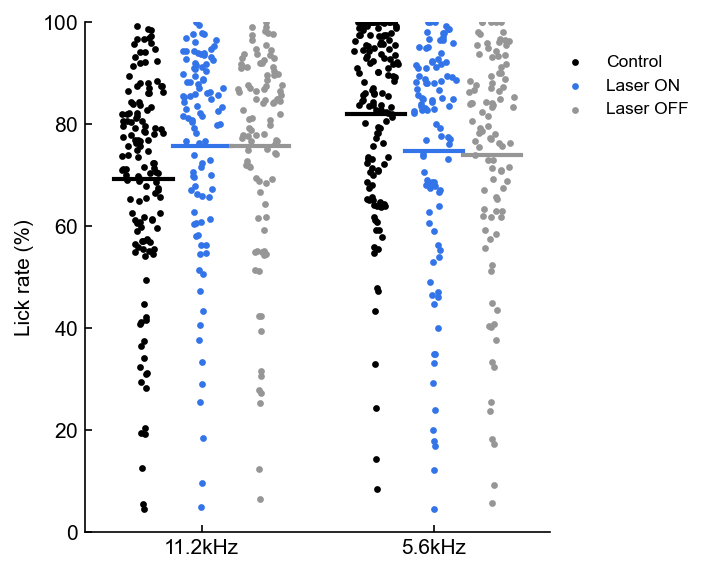

In [89]:
fig, ax = plt.subplots(figsize=(4,4.5))

X,Y = ilep.violin(lick_rate_11kHz_control,width=0.25)
X=X-0.25
ax.scatter(X,Y*100,s=5,color='k',label='Control')
ax.plot([-0.25-0.125,-0.25+0.125],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_11kHz_on,width=0.25)
X=X+0
ax.scatter(X,Y*100,s=5,color=LASER_COLOR,label='Laser ON')
ax.plot([-0.125,0.125],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_11kHz_off,width=0.25)
X=X+0.25
ax.scatter(X,Y*100,s=5,color=GOOD_GREY,label='Laser OFF')
ax.plot([0.25-0.125,0.25+0.125],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)





X,Y = ilep.violin(lick_rate_5kHz_control,width=0.25)
X=X-0.25+1
ax.scatter(X,Y*100,s=5,color='k')
ax.plot([-0.25-0.125+1,-0.25+0.125+1],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_5kHz_on,width=0.25)
X=X+1
ax.scatter(X,Y*100,s=5,color=LASER_COLOR)
ax.plot([-0.125+1,0.125+1],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_5kHz_off,width=0.25)
X=X+0.25+1
ax.scatter(X,Y*100,s=5,color=GOOD_GREY)
ax.plot([0.25-0.125+1,0.25+0.125+1],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)




ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['11.2kHz','5.6kHz'])

ax.set_ylim([0,100])
ax.set_ylabel('Lick rate (%)')

lgd = ax.legend(frameon=False,loc=(1,0.8))



plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate by tone.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate by tone.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [90]:
### Create dataframe ###
tone = len(lick_rate_11kHz_control)*["11kHz"] + len(lick_rate_5kHz_control)*["5kHz"] \
    + len(lick_rate_11kHz_on)*["11kHz"] + len(lick_rate_5kHz_on)*["5kHz"] \
    + len(lick_rate_11kHz_off)*["11kHz"] + len(lick_rate_5kHz_off)*["5kHz"] \

context = len(lick_rate_11kHz_control)*["control"] + len(lick_rate_5kHz_control)*["control"] \
    + len(lick_rate_11kHz_on)*["on"] + len(lick_rate_5kHz_on)*["on"] \
    + len(lick_rate_11kHz_off)*["off"] + len(lick_rate_5kHz_off)*["off"] \

lick_rate = (np.concatenate([lick_rate_11kHz_control, lick_rate_5kHz_control,
    lick_rate_11kHz_on, lick_rate_5kHz_on,
    lick_rate_11kHz_off, lick_rate_5kHz_off]))

df = pd.DataFrame({"tone": tone, "context": context, "lick_rate": lick_rate})




anova = pg.anova(data=df, dv='lick_rate', between=['tone','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='lick_rate', between=['tone','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "tone * context"][["tone","A", "B", "p-unc", "p-corr", "hedges"]])

           Source         SS     DF        MS         F     p-unc       np2
0            tone   0.314667    1.0  0.314667  7.403913  0.006679  0.011060
1         context   0.006521    2.0  0.003260  0.076717  0.926160  0.000232
2  tone * context   0.803509    2.0  0.401754  9.453018  0.000090  0.027766
3        Residual  28.135074  662.0  0.042500       NaN       NaN       NaN

    tone        A    B     p-unc    p-corr    hedges
4  11kHz  control  off  0.002363  0.005874 -0.318836
5  11kHz  control   on  0.002937  0.005874 -0.311681
6  11kHz      off   on  0.931804  0.931804  0.005609
7   5kHz  control  off  0.002884  0.005874  0.404104
8   5kHz  control   on  0.011901  0.017851  0.357451
9   5kHz      off   on  0.583557  0.700268 -0.035587


# Opsin target / non-target lick rate analysis -- Post Early

In [91]:
lick_rate_11kHz_off = []
lick_rate_5kHz_off = []
lick_rate_11kHz_on = []
lick_rate_5kHz_on = []
lick_rate_11kHz_control = []
lick_rate_5kHz_control = []

with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
                trialsPerDayLoaded = pickle.load(f)
        
for animal in dualanimalnames:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        if session not in learning_phases[animal].post_early_days:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes = outcomes[trialsActive]
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes,1))
        miss = np.sum(np.equal(outcomes,2))
        falarm = np.sum(np.equal(outcomes,3))
        creject = np.sum(np.equal(outcomes,4))
        
        lick_rate_11kHz = falarm / (falarm + creject)
        lick_rate_5kHz = hit / (hit + miss)
        
        lick_rate_11kHz_control.append(lick_rate_11kHz)
        lick_rate_5kHz_control.append(lick_rate_5kHz)
        
for animal in did_not_learn:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        laser_on = np.where(animalBehaviors[animal].sessions[session].laser)[0]
        laser_off = np.where(np.logical_not(animalBehaviors[animal].sessions[session].laser))[0]
        
#         print(f"outcomes = {outcomes}")
#         print(f"active = {trialsPerDayLoaded[animal][session]}")
#         print(f"on = {laser_on}")
#         print(f"off = {laser_off}")
        
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes_on_mask = laser_on[np.isin(laser_on,trialsActive)]
        outcomes_off_mask = laser_off[np.isin(laser_off,trialsActive)]
        
#         print(f"on_mask = {outcomes_on_mask}")
#         print(f"off_mask = {outcomes_off_mask}")
        
        outcomes_on = outcomes[outcomes_on_mask]
        outcomes_off = outcomes[outcomes_off_mask]
        
#         print(f"outcomes_on = {outcomes_on}")
#         print(f"outcomes_off = {outcomes_off}")
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_on,1))
        miss = np.sum(np.equal(outcomes_on,2))
        falarm = np.sum(np.equal(outcomes_on,3))
        creject = np.sum(np.equal(outcomes_on,4))
        this_lick_rate_11kHz_on = falarm / (falarm + creject)
        this_lick_rate_5kHz_on = hit / (hit + miss)
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_off,1))
        miss = np.sum(np.equal(outcomes_off,2))
        falarm = np.sum(np.equal(outcomes_off,3))
        creject = np.sum(np.equal(outcomes_off,4))
        this_lick_rate_11kHz_off = falarm / (falarm + creject)
        this_lick_rate_5kHz_off = hit / (hit + miss)
        
        lick_rate_11kHz_on.append(this_lick_rate_11kHz_on)
        lick_rate_5kHz_on.append(this_lick_rate_5kHz_on)
        lick_rate_11kHz_off.append(this_lick_rate_11kHz_off)
        lick_rate_5kHz_off.append(this_lick_rate_5kHz_off)

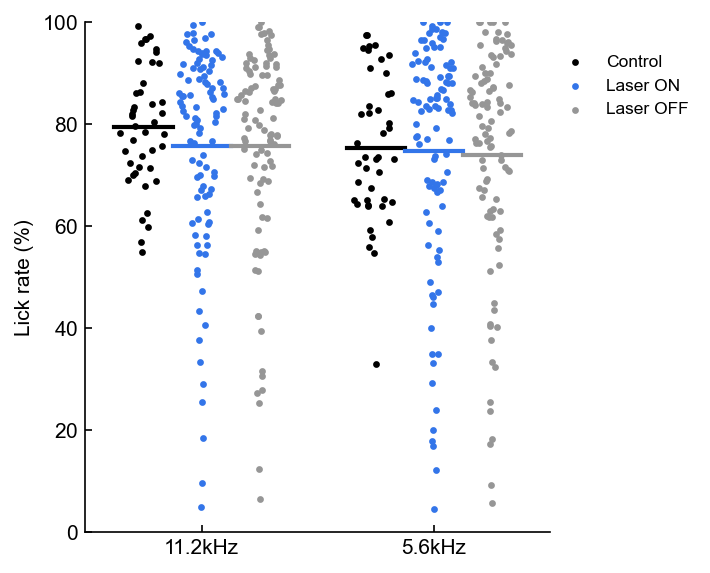

In [92]:
fig, ax = plt.subplots(figsize=(4,4.5))

X,Y = ilep.violin(lick_rate_11kHz_control,width=0.25)
X=X-0.25
ax.scatter(X,Y*100,s=5,color='k',label='Control')
ax.plot([-0.25-0.125,-0.25+0.125],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_11kHz_on,width=0.25)
X=X+0
ax.scatter(X,Y*100,s=5,color=LASER_COLOR,label='Laser ON')
ax.plot([-0.125,0.125],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_11kHz_off,width=0.25)
X=X+0.25
ax.scatter(X,Y*100,s=5,color=GOOD_GREY,label='Laser OFF')
ax.plot([0.25-0.125,0.25+0.125],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)





X,Y = ilep.violin(lick_rate_5kHz_control,width=0.25)
X=X-0.25+1
ax.scatter(X,Y*100,s=5,color='k')
ax.plot([-0.25-0.125+1,-0.25+0.125+1],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_5kHz_on,width=0.25)
X=X+1
ax.scatter(X,Y*100,s=5,color=LASER_COLOR)
ax.plot([-0.125+1,0.125+1],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_5kHz_off,width=0.25)
X=X+0.25+1
ax.scatter(X,Y*100,s=5,color=GOOD_GREY)
ax.plot([0.25-0.125+1,0.25+0.125+1],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)




ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['11.2kHz','5.6kHz'])

ax.set_ylim([0,100])
ax.set_ylabel('Lick rate (%)')

lgd = ax.legend(frameon=False,loc=(1,0.8))



plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate early by tone.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate early by tone.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [93]:
### Create dataframe ###
tone = len(lick_rate_11kHz_control)*["11kHz"] + len(lick_rate_5kHz_control)*["5kHz"] \
    + len(lick_rate_11kHz_on)*["11kHz"] + len(lick_rate_5kHz_on)*["5kHz"] \
    + len(lick_rate_11kHz_off)*["11kHz"] + len(lick_rate_5kHz_off)*["5kHz"] \

context = len(lick_rate_11kHz_control)*["control"] + len(lick_rate_5kHz_control)*["control"] \
    + len(lick_rate_11kHz_on)*["on"] + len(lick_rate_5kHz_on)*["on"] \
    + len(lick_rate_11kHz_off)*["off"] + len(lick_rate_5kHz_off)*["off"] \

lick_rate = (np.concatenate([lick_rate_11kHz_control, lick_rate_5kHz_control,
    lick_rate_11kHz_on, lick_rate_5kHz_on,
    lick_rate_11kHz_off, lick_rate_5kHz_off]))

df = pd.DataFrame({"tone": tone, "context": context, "lick_rate": lick_rate})




anova = pg.anova(data=df, dv='lick_rate', between=['tone','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='lick_rate', between=['tone','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "tone * context"][["tone","A", "B", "p-unc", "p-corr", "hedges"]])

           Source         SS     DF        MS         F     p-unc       np2
0            tone   0.043118    1.0  0.043118  1.048067  0.306473  0.002197
1         context   0.044291    2.0  0.022146  0.538291  0.584100  0.002257
2  tone * context   0.015487    2.0  0.007743  0.188217  0.828496  0.000790
3        Residual  19.582928  476.0  0.041141       NaN       NaN       NaN

    tone        A    B     p-unc    p-corr    hedges
4  11kHz  control  off  0.964587  0.964587  0.207826
5  11kHz  control   on  0.871262  0.964587  0.211918
6  11kHz      off   on  0.931804  0.964587  0.005609
7   5kHz  control  off  0.529835  0.964587  0.073795
8   5kHz  control   on  0.288628  0.964587  0.033142
9   5kHz      off   on  0.583557  0.964587 -0.035587


# Opsin target / non-target lick rate analysis -- Post Expert

In [94]:
lick_rate_11kHz_off = []
lick_rate_5kHz_off = []
lick_rate_11kHz_on = []
lick_rate_5kHz_on = []
lick_rate_11kHz_control = []
lick_rate_5kHz_control = []

with open('C:\\Users\\insan\\Desktop\\trialsToUsePerDay', 'rb') as f:
                trialsPerDayLoaded = pickle.load(f)
        
for animal in dualanimalnames:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        if session not in learning_phases[animal].post_expert_days:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes = outcomes[trialsActive]
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes,1))
        miss = np.sum(np.equal(outcomes,2))
        falarm = np.sum(np.equal(outcomes,3))
        creject = np.sum(np.equal(outcomes,4))
        
        lick_rate_11kHz = falarm / (falarm + creject)
        lick_rate_5kHz = hit / (hit + miss)
        
        lick_rate_11kHz_control.append(lick_rate_11kHz)
        lick_rate_5kHz_control.append(lick_rate_5kHz)
        
for animal in did_not_learn:
    if not hasattr(animalBehaviors[animal],'reversal') or not np.isfinite(animalBehaviors[animal].reversal):
        continue
        
    for session in animalBehaviors[animal].sessions:
        if session <= animalBehaviors[animal].reversal:
            continue
            
        outcomes = np.array(animalBehaviors[animal].sessions[session].outcomes)
        laser_on = np.where(animalBehaviors[animal].sessions[session].laser)[0]
        laser_off = np.where(np.logical_not(animalBehaviors[animal].sessions[session].laser))[0]
        
#         print(f"outcomes = {outcomes}")
#         print(f"active = {trialsPerDayLoaded[animal][session]}")
#         print(f"on = {laser_on}")
#         print(f"off = {laser_off}")
        
        #trialsActive = trialsPerDayLoaded[animal][session]
        trialsActive = range(len(outcomes)) # disabled because opsin
        outcomes_on_mask = laser_on[np.isin(laser_on,trialsActive)]
        outcomes_off_mask = laser_off[np.isin(laser_off,trialsActive)]
        
#         print(f"on_mask = {outcomes_on_mask}")
#         print(f"off_mask = {outcomes_off_mask}")
        
        outcomes_on = outcomes[outcomes_on_mask]
        outcomes_off = outcomes[outcomes_off_mask]
        
#         print(f"outcomes_on = {outcomes_on}")
#         print(f"outcomes_off = {outcomes_off}")
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_on,1))
        miss = np.sum(np.equal(outcomes_on,2))
        falarm = np.sum(np.equal(outcomes_on,3))
        creject = np.sum(np.equal(outcomes_on,4))
        this_lick_rate_11kHz_on = falarm / (falarm + creject)
        this_lick_rate_5kHz_on = hit / (hit + miss)
        
        #print(f"{animal} session {session}: {len(outcomes)} trials")
        hit = np.sum(np.equal(outcomes_off,1))
        miss = np.sum(np.equal(outcomes_off,2))
        falarm = np.sum(np.equal(outcomes_off,3))
        creject = np.sum(np.equal(outcomes_off,4))
        this_lick_rate_11kHz_off = falarm / (falarm + creject)
        this_lick_rate_5kHz_off = hit / (hit + miss)
        
        lick_rate_11kHz_on.append(this_lick_rate_11kHz_on)
        lick_rate_5kHz_on.append(this_lick_rate_5kHz_on)
        lick_rate_11kHz_off.append(this_lick_rate_11kHz_off)
        lick_rate_5kHz_off.append(this_lick_rate_5kHz_off)

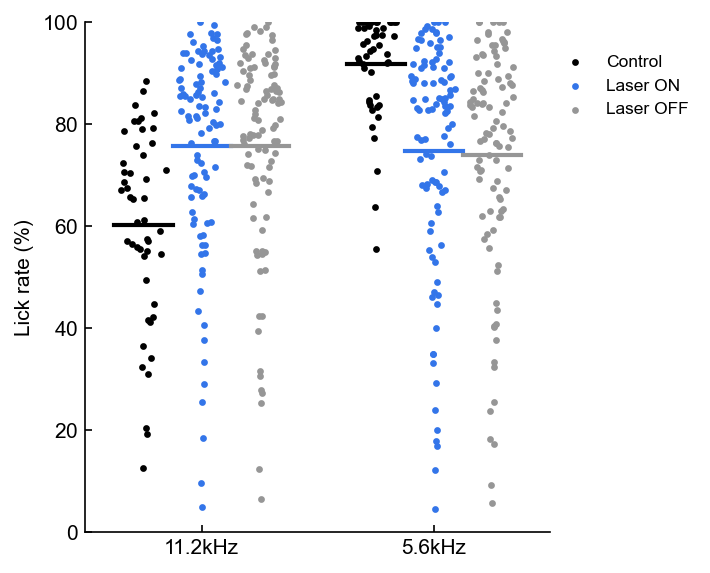

In [95]:
fig, ax = plt.subplots(figsize=(4,4.5))

X,Y = ilep.violin(lick_rate_11kHz_control,width=0.25)
X=X-0.25
ax.scatter(X,Y*100,s=5,color='k',label='Control')
ax.plot([-0.25-0.125,-0.25+0.125],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_11kHz_on,width=0.25)
X=X+0
ax.scatter(X,Y*100,s=5,color=LASER_COLOR,label='Laser ON')
ax.plot([-0.125,0.125],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_11kHz_off,width=0.25)
X=X+0.25
ax.scatter(X,Y*100,s=5,color=GOOD_GREY,label='Laser OFF')
ax.plot([0.25-0.125,0.25+0.125],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)





X,Y = ilep.violin(lick_rate_5kHz_control,width=0.25)
X=X-0.25+1
ax.scatter(X,Y*100,s=5,color='k')
ax.plot([-0.25-0.125+1,-0.25+0.125+1],[np.mean(Y)*100]*2,color='k',lw=2)

X,Y = ilep.violin(lick_rate_5kHz_on,width=0.25)
X=X+1
ax.scatter(X,Y*100,s=5,color=LASER_COLOR)
ax.plot([-0.125+1,0.125+1],[np.mean(Y)*100]*2,color=LASER_COLOR,lw=2)

X,Y = ilep.violin(lick_rate_5kHz_off,width=0.25)
X=X+0.25+1
ax.scatter(X,Y*100,s=5,color=GOOD_GREY)
ax.plot([0.25-0.125+1,0.25+0.125+1],[np.mean(Y)*100]*2,color=GOOD_GREY,lw=2)




ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['11.2kHz','5.6kHz'])

ax.set_ylim([0,100])
ax.set_ylabel('Lick rate (%)')

lgd = ax.legend(frameon=False,loc=(1,0.8))




plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate expert by tone.pdf'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig(os.path.join('D:\\\\Figures','Automated Behavior Figures','Opsin lick rate expert by tone.png'),transparent=False,facecolor="white", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [96]:
### Create dataframe ###
tone = len(lick_rate_11kHz_control)*["11kHz"] + len(lick_rate_5kHz_control)*["5kHz"] \
    + len(lick_rate_11kHz_on)*["11kHz"] + len(lick_rate_5kHz_on)*["5kHz"] \
    + len(lick_rate_11kHz_off)*["11kHz"] + len(lick_rate_5kHz_off)*["5kHz"] \

context = len(lick_rate_11kHz_control)*["control"] + len(lick_rate_5kHz_control)*["control"] \
    + len(lick_rate_11kHz_on)*["on"] + len(lick_rate_5kHz_on)*["on"] \
    + len(lick_rate_11kHz_off)*["off"] + len(lick_rate_5kHz_off)*["off"] \

lick_rate = (np.concatenate([lick_rate_11kHz_control, lick_rate_5kHz_control,
    lick_rate_11kHz_on, lick_rate_5kHz_on,
    lick_rate_11kHz_off, lick_rate_5kHz_off]))

df = pd.DataFrame({"tone": tone, "context": context, "lick_rate": lick_rate})




anova = pg.anova(data=df, dv='lick_rate', between=['tone','context'], detailed=True)
print(anova)
print()

### Create and print results ###
pairwise_mwu = pg.pairwise_tests(data=df, dv='lick_rate', between=['tone','context'], padjust="fdr_bh", parametric=False, )
print(pairwise_mwu[pairwise_mwu["Contrast"] == "tone * context"][["tone","A", "B", "p-unc", "p-corr", "hedges"]])

           Source         SS     DF        MS          F         p-unc  \
0            tone   0.313174    1.0  0.313174   7.512841  6.351729e-03   
1         context   0.008771    2.0  0.004385   0.105204  9.001614e-01   
2  tone * context   2.110538    2.0  1.055269  25.315221  3.479478e-11   
3        Residual  20.258983  486.0  0.041685        NaN           NaN   

        np2  
0  0.015223  
1  0.000433  
2  0.094349  
3       NaN  

    tone        A    B         p-unc        p-corr    hedges
4  11kHz  control  off  6.305913e-07  1.220621e-06 -0.784051
5  11kHz  control   on  8.137474e-07  1.220621e-06 -0.771724
6  11kHz      off   on  9.318039e-01  9.318039e-01  0.005609
7   5kHz  control  off  1.363680e-08  8.182077e-08  0.931411
8   5kHz  control   on  5.300498e-08  1.590149e-07  0.864383
9   5kHz      off   on  5.835570e-01  7.002684e-01 -0.035587
